# Fantasy Premier League

## Budget

For the begining of the Season, managers are given a budget of 100M $. Then each player buy any combination of player not exceeding this limit.

In this notebook, we will study the patterns that appear in the budget strategy of top managers from the **2020-2021** FPL Season.

In [1]:
import pandas as pd
import numpy as np
import glob
import os

path = '../data/fpl_official/20-21/season/processed/'

all_files = (
    glob.glob(os.path.join(path, "gk_value_[0-9][0-9][0-9][0-9].csv")) +
    glob.glob(os.path.join(path, "gk_value_[0-9][0-9][0-9][0-9][0-9].csv")) + 
    glob.glob(os.path.join(path, "gk_value_100000.csv"))
)
gk_value = (
    pd.read_csv(f, index_col=0)
    for f in all_files)
gk_value = pd.concat(gk_value)
gk_value.sort_index(inplace=True)

all_files = (
    glob.glob(os.path.join(path, "def_value_[0-9][0-9][0-9][0-9].csv")) +
    glob.glob(os.path.join(path, "def_value_[0-9][0-9][0-9][0-9][0-9].csv")) + 
    glob.glob(os.path.join(path, "def_value_100000.csv"))
)
def_value = (
    pd.read_csv(f, index_col=0)
    for f in all_files)
def_value = pd.concat(def_value)
def_value.sort_index(inplace=True)

all_files = (
    glob.glob(os.path.join(path, "mid_value_[0-9][0-9][0-9][0-9].csv")) +
    glob.glob(os.path.join(path, "mid_value_[0-9][0-9][0-9][0-9][0-9].csv")) + 
    glob.glob(os.path.join(path, "mid_value_100000.csv"))
)
mid_value = (
    pd.read_csv(f, index_col=0)
    for f in all_files)
mid_value = pd.concat(mid_value)
mid_value.sort_index(inplace=True)

all_files = (
    glob.glob(os.path.join(path, "fwd_value_[0-9][0-9][0-9][0-9].csv")) +
    glob.glob(os.path.join(path, "fwd_value_[0-9][0-9][0-9][0-9][0-9].csv")) + 
    glob.glob(os.path.join(path, "fwd_value_100000.csv"))
)
fwd_value = (
    pd.read_csv(f, index_col=0)
    for f in all_files)
fwd_value = pd.concat(fwd_value)
fwd_value.sort_index(inplace=True)

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
from highlight_text import fig_text

body_font = "Open Sans"
watermark_font = "DejaVu Sans"
text_color = "w"
background = "#282B2F"
title_font = "DejaVu Sans"

mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color
mpl.rcParams['text.color'] = text_color
mpl.rcParams['axes.edgecolor'] = text_color
mpl.rcParams['xtick.labelsize'] = 6
mpl.rcParams['ytick.labelsize'] = 6

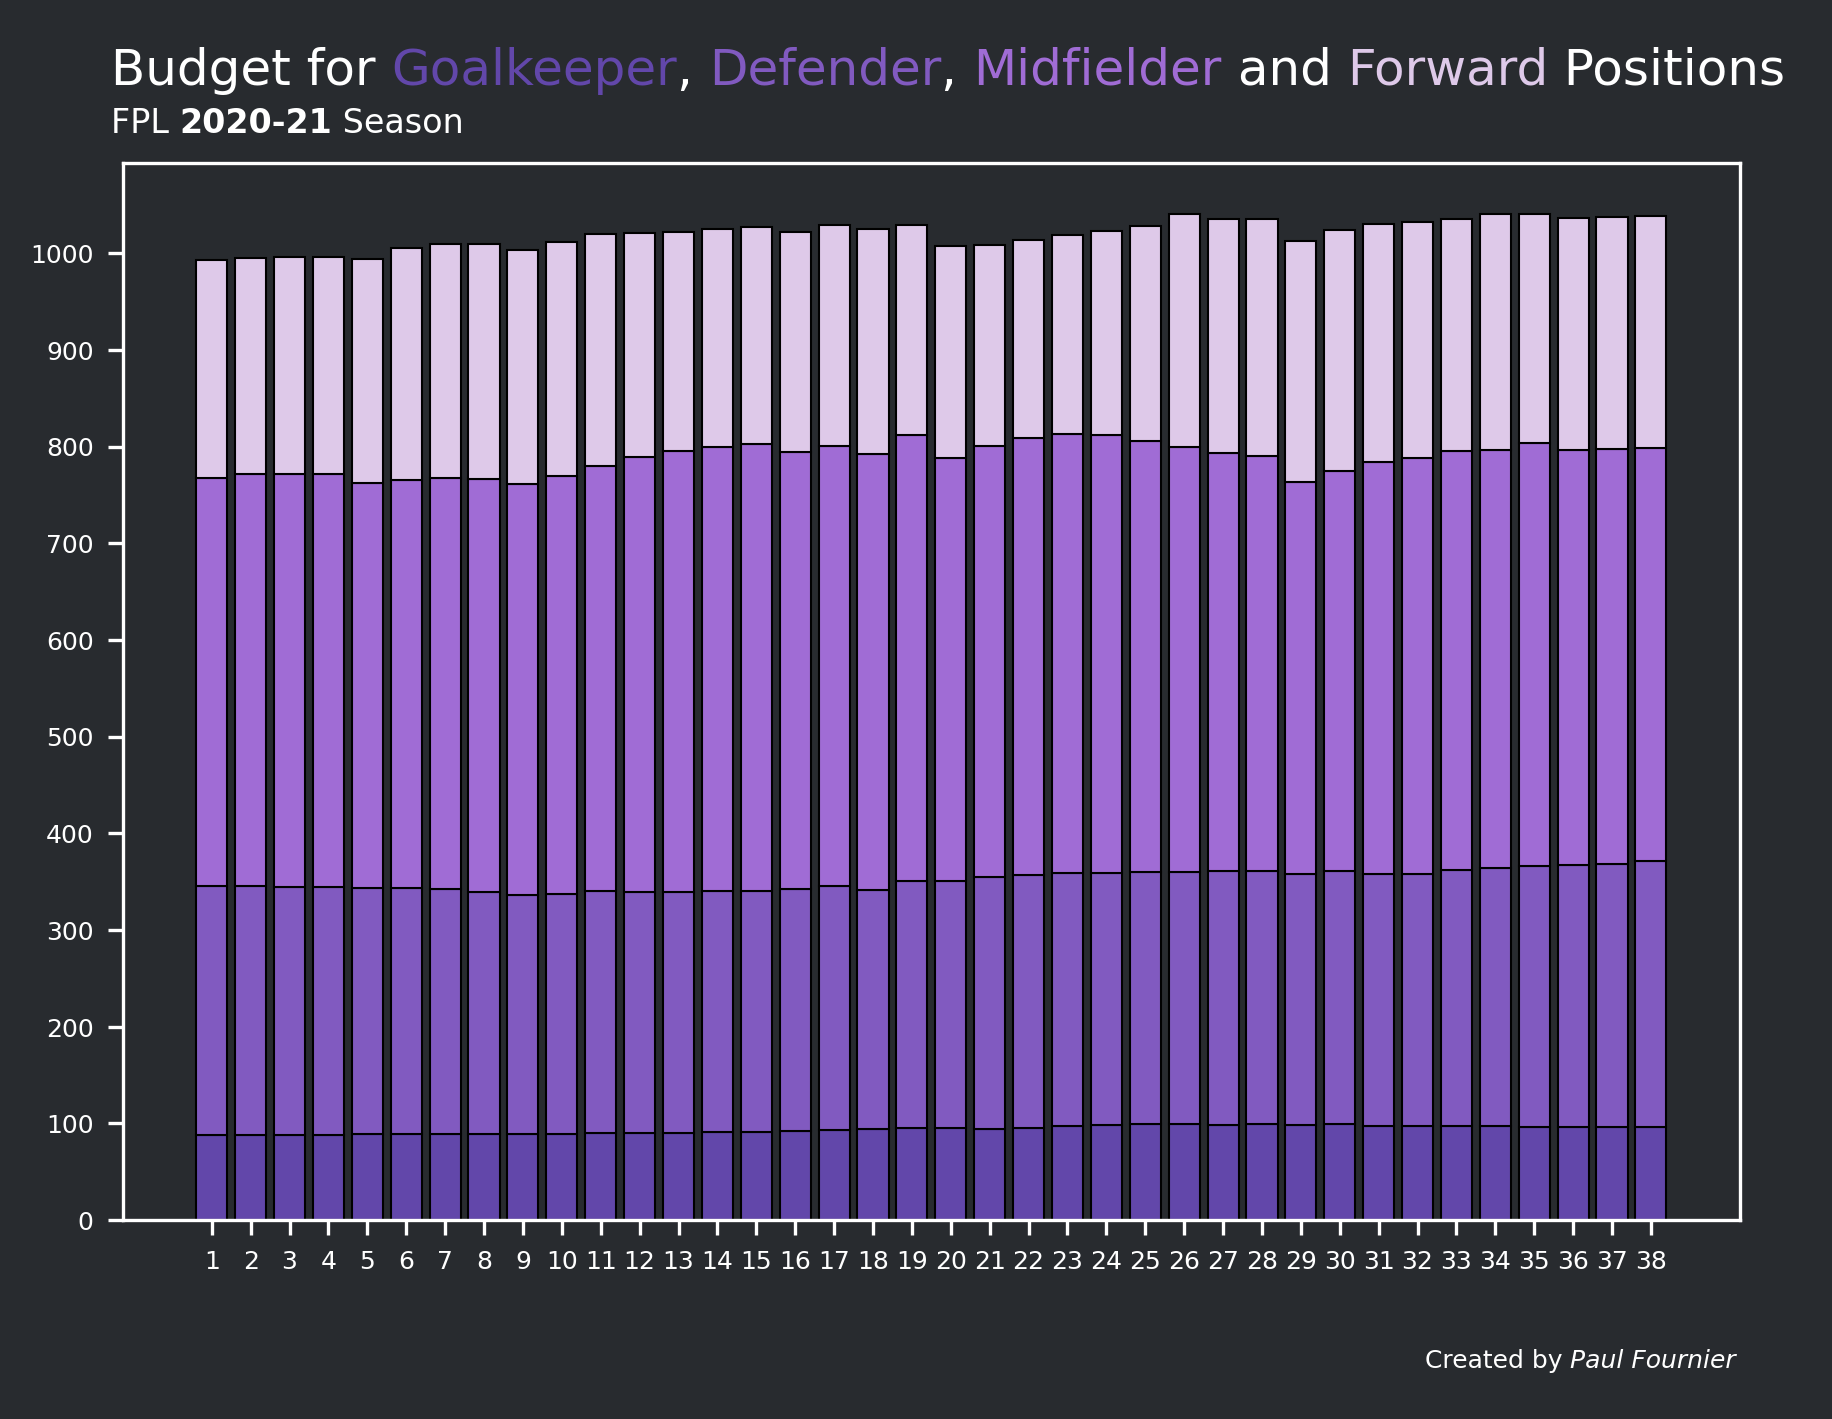

In [3]:
fig, ax = plt.subplots(tight_layout=True)
fig.set_facecolor(background)
ax.patch.set_alpha(0)

gk, defender, mid, fwd = [], [], [], []

for gw in range(1, 39):
    gk.append(np.mean(gk_value.loc[:, str(gw)]))
    defender.append(np.mean(def_value.loc[:, str(gw)]))
    mid.append(np.mean(mid_value.loc[:, str(gw)]))
    fwd.append(np.mean(fwd_value.loc[:, str(gw)]))

ax.bar(
    np.arange(1, 39), gk,
    color='#6247aa', edgecolor='black', linewidth=0.5)
bottom_y = np.array(gk)

ax.bar(
    np.arange(1, 39), defender,
    color='#815ac0', edgecolor='black', linewidth=0.5,
    bottom=bottom_y)
bottom_y += np.array(defender)

ax.bar(
    np.arange(1, 39), mid,
    color='#a06cd5', edgecolor='black', linewidth=0.5,
    bottom=bottom_y)
bottom_y += np.array(mid)

ax.bar(
    np.arange(1, 39), fwd,
    color='#dec9e9', edgecolor='black', linewidth=0.5,
    bottom=bottom_y)

ax.set_xticks(np.arange(1, 39), minor=False)
ax.set_yticks(np.arange(0, 1010, 100), minor=False)

fig_text(
    x=0.07, y=1.06,
    s="Budget for <Goalkeeper>, <Defender>, <Midfielder> and <Forward> Positions",
    highlight_textprops=[
        {"color": '#6247aa'},
        {"color": '#815ac0'},
        {"color": '#a06cd5'},
        {"color": '#dec9e9'},
        ],
    fontsize=12, fontfamily=title_font, color=text_color, alpha=1)
fig_text(
    x=0.07, y=1.01,
    s="FPL <2020-21> Season",
    highlight_textprops=[{"fontweight": "bold"}],
    fontsize=8, fontfamily=title_font, color=text_color, alpha=1)

fig_text(
    x=0.8, y=-0.025,
    s="Created by <Paul Fournier>",
    highlight_textprops=[{"fontstyle": "italic"}],
    fontsize=6, fontfamily=watermark_font, color=text_color)

plt.show()

This graph shows an interesting tendency. More than **65%** of the budget is spent on the *Midfielders* and *Forward* (who make up 8 out of 15 of the entire team).

In [4]:
all_files = (
    glob.glob(os.path.join(path, "team_value_[0-9][0-9][0-9][0-9].csv")) +
    glob.glob(os.path.join(path, "team_value_[0-9][0-9][0-9][0-9][0-9].csv")) + 
    glob.glob(os.path.join(path, "team_value_100000.csv"))
)
team_value = (
    pd.read_csv(f, index_col=0)
    for f in all_files)
team_value = pd.concat(team_value)
team_value.sort_index(inplace=True)

gk_percent = gk_value / team_value
def_percent = def_value / team_value
mid_percent = mid_value / team_value
fwd_percent = fwd_value / team_value

In [5]:
gk_percent_display = pd.DataFrame(
    columns=["1st QT", "2nd QT", "3rd QT", "4th QT"],
    index=["Top10K", "Top25K", "Top100K"])

for row, rank_range in zip(
        ["Top10K", "Top25K", "Top100K"],
        [(0,1000), (10000,25000), (25000,100000)]):
    for col, gw_range in zip(
            ["1st QT", "2nd QT", "3rd QT", "4th QT"],
            [(1,8), (9, 16), (17, 26), (27, 39)]):
        gk_percent_display.loc[row, col] = np.mean(
            np.mean(gk_percent[[str(gw) for gw in np.arange(
                gw_range[0], gw_range[1])]].iloc[rank_range[0]:rank_range[1]], axis=1))*100

gk_value_display = pd.DataFrame(
    columns=["1st QT", "2nd QT", "3rd QT", "4th QT"],
    index=["Top10K", "Top25K", "Top100K"])

for row, rank_range in zip(
        ["Top10K", "Top25K", "Top100K"],
        [(0,1000), (10000,25000), (25000,100000)]):
    for col, gw_range in zip(
            ["1st QT", "2nd QT", "3rd QT", "4th QT"],
            [(1,8), (9, 16), (17, 26), (27, 39)]):
        gk_value_display.loc[row, col] = np.mean(
            np.mean(gk_value[[str(gw) for gw in np.arange(
                gw_range[0], gw_range[1])]].iloc[rank_range[0]:rank_range[1]], axis=1))

gk_percent_display, gk_value_display

(          1st QT   2nd QT   3rd QT   4th QT
 Top10K   8.74445  8.74639  9.42941  9.29054
 Top25K   8.80604  8.79956  9.38869  9.40049
 Top100K  8.89557  8.87235  9.38784  9.49413,
           1st QT   2nd QT   3rd QT   4th QT
 Top10K   87.5033  89.4257  96.4602  96.8697
 Top25K   87.9736  89.6698  95.7985  97.2969
 Top100K  88.7963  90.2993  95.6829  97.9087)

First bit of insight we can draw from the data is that the higher the rank the lower the budget alloted towards buying goalkeepers. In the first few gameweeks of the season, the cocensus amongst managers is to spend less than 9M on goalkeeps.

In [6]:
def_percent_display = pd.DataFrame(
    columns=["1st QT", "2nd QT", "3rd QT", "4th QT"],
    index=["Top10K", "Top25K", "Top100K"])
for row, rank_range in zip(
        ["Top10K", "Top25K", "Top100K"],
        [(0,1000), (10000,25000), (25000,100000)]):
    for col, gw_range in zip(
            ["1st QT", "2nd QT", "3rd QT", "4th QT"],
            [(1,8), (9, 16), (17, 26), (27, 39)]):
        def_percent_display.loc[row, col] = np.mean(
            np.mean(def_percent[[str(gw) for gw in np.arange(
                gw_range[0], gw_range[1])]].iloc[rank_range[0]:rank_range[1]], axis=1))*100

def_value_display = pd.DataFrame(
    columns=["1st QT", "2nd QT", "3rd QT", "4th QT"],
    index=["Top10K", "Top25K", "Top100K"])
for row, rank_range in zip(
        ["Top10K", "Top25K", "Top100K"],
        [(0,1000), (10000,25000), (25000,100000)]):
    for col, gw_range in zip(
            ["1st QT", "2nd QT", "3rd QT", "4th QT"],
            [(1,8), (9, 16), (17, 26), (27, 39)]):
        def_value_display.loc[row, col] = np.mean(
            np.mean(def_value[[str(gw) for gw in np.arange(
                gw_range[0], gw_range[1])]].iloc[rank_range[0]:rank_range[1]], axis=1))

def_percent_display, def_value_display

(          1st QT   2nd QT   3rd QT   4th QT
 Top10K   25.7133  24.6552  25.4219  25.5757
 Top25K   25.6595  24.4703  25.2686  25.6586
 Top100K  25.5997  24.4642  25.2122  25.7137,
           1st QT   2nd QT   3rd QT   4th QT
 Top10K   257.295  252.098  260.048  266.744
 Top25K   256.323  249.364  257.817  265.631
 Top100K  255.523  248.994  256.962  265.228)

Now here we can see some very interesting data. Defenders make a bigger chunk of the budget for better ranked managers.

In [7]:
mid_percent_display = pd.DataFrame(
    columns=["1st QT", "2nd QT", "3rd QT", "4th QT"],
    index=["Top10K", "Top25K", "Top100K"])
for row, rank_range in zip(
        ["Top10K", "Top25K", "Top100K"],
        [(0,1000), (10000,25000), (25000,100000)]):
    for col, gw_range in zip(
            ["1st QT", "2nd QT", "3rd QT", "4th QT"],
            [(1,8), (9, 16), (17, 26), (27, 39)]):
        mid_percent_display.loc[row, col] = np.mean(
            np.mean(mid_percent[[str(gw) for gw in np.arange(
                gw_range[0], gw_range[1])]].iloc[rank_range[0]:rank_range[1]], axis=1))*100

mid_value_display = pd.DataFrame(
    columns=["1st QT", "2nd QT", "3rd QT", "4th QT"],
    index=["Top10K", "Top25K", "Top100K"])
for row, rank_range in zip(
        ["Top10K", "Top25K", "Top100K"],
        [(0,1000), (10000,25000), (25000,100000)]):
    for col, gw_range in zip(
            ["1st QT", "2nd QT", "3rd QT", "4th QT"],
            [(1,8), (9, 16), (17, 26), (27, 39)]):
        mid_value_display.loc[row, col] = np.mean(
            np.mean(mid_value[[str(gw) for gw in np.arange(
                gw_range[0], gw_range[1])]].iloc[rank_range[0]:rank_range[1]], axis=1))

mid_percent_display, mid_value_display

(          1st QT   2nd QT   3rd QT   4th QT
 Top10K   42.4198   44.344  44.2735  41.7645
 Top25K   42.4563  44.0515  44.2653  41.4374
 Top100K  42.4567  43.6844  44.1253   41.229,
           1st QT   2nd QT   3rd QT   4th QT
 Top10K   424.552  453.639  453.287  435.906
 Top25K   424.226  449.098  451.993  429.288
 Top100K  423.903  444.808  450.071  425.547)

Now we cannot draw very interesting insights. Most managers seem to spend their budget the same way throughout the season for the Midfield positions.

In [8]:
fwd_percent_display = pd.DataFrame(
    columns=["1st QT", "2nd QT", "3rd QT", "4th QT"],
    index=["Top10K", "Top25K", "Top100K"])
for row, rank_range in zip(
        ["Top10K", "Top25K", "Top100K"],
        [(0,1000), (10000,25000), (25000,100000)]):
    for col, gw_range in zip(
            ["1st QT", "2nd QT", "3rd QT", "4th QT"],
            [(1,8), (9, 16), (17, 26), (27, 39)]):
        fwd_percent_display.loc[row, col] = np.mean(
            np.mean(fwd_percent[[str(gw) for gw in np.arange(gw_range[0], gw_range[1])]].iloc[rank_range[0]:rank_range[1]], axis=1))*100

fwd_value_display = pd.DataFrame(
    columns=["1st QT", "2nd QT", "3rd QT", "4th QT"],
    index=["Top10K", "Top25K", "Top100K"])
for row, rank_range in zip(
        ["Top10K", "Top25K", "Top100K"],
        [(0,1000), (10000,25000), (25000,100000)]):
    for col, gw_range in zip(
            ["1st QT", "2nd QT", "3rd QT", "4th QT"],
            [(1,8), (9, 16), (17, 26), (27, 39)]):
        fwd_value_display.loc[row, col] = np.mean(
            np.mean(fwd_value[[str(gw) for gw in np.arange(gw_range[0], gw_range[1])]].iloc[rank_range[0]:rank_range[1]], axis=1))

fwd_percent_display, fwd_value_display

(          1st QT   2nd QT   3rd QT   4th QT
 Top10K   23.1225  22.2544  20.8752  23.3692
 Top25K   23.0581  22.6786  21.0774  23.5035
 Top100K  22.9949   22.979  21.2747  23.5632,
           1st QT   2nd QT   3rd QT   4th QT
 Top10K   231.442  227.465  213.686  243.691
 Top25K   230.418  231.057  215.197    243.3
 Top100K  229.601  233.849  216.963  243.039)

# Bench value

In [9]:
all_files = (
    glob.glob(os.path.join(path, "bench_value_[0-9][0-9][0-9][0-9].csv")) +
    glob.glob(os.path.join(path, "bench_value_[0-9][0-9][0-9][0-9][0-9].csv")) + 
    glob.glob(os.path.join(path, "bench_value_100000.csv"))
)
bench_value = (
    pd.read_csv(f, index_col=0)
    for f in all_files)
bench_value = pd.concat(bench_value)
bench_value.sort_index(inplace=True)

all_files = (
    glob.glob(os.path.join(path, "team_value_[0-9][0-9][0-9][0-9].csv")) +
    glob.glob(os.path.join(path, "team_value_[0-9][0-9][0-9][0-9][0-9].csv")) + 
    glob.glob(os.path.join(path, "team_value_100000.csv"))
)
team_value = (
    pd.read_csv(f, index_col=0)
    for f in all_files)
team_value = pd.concat(team_value)
team_value.sort_index(inplace=True)

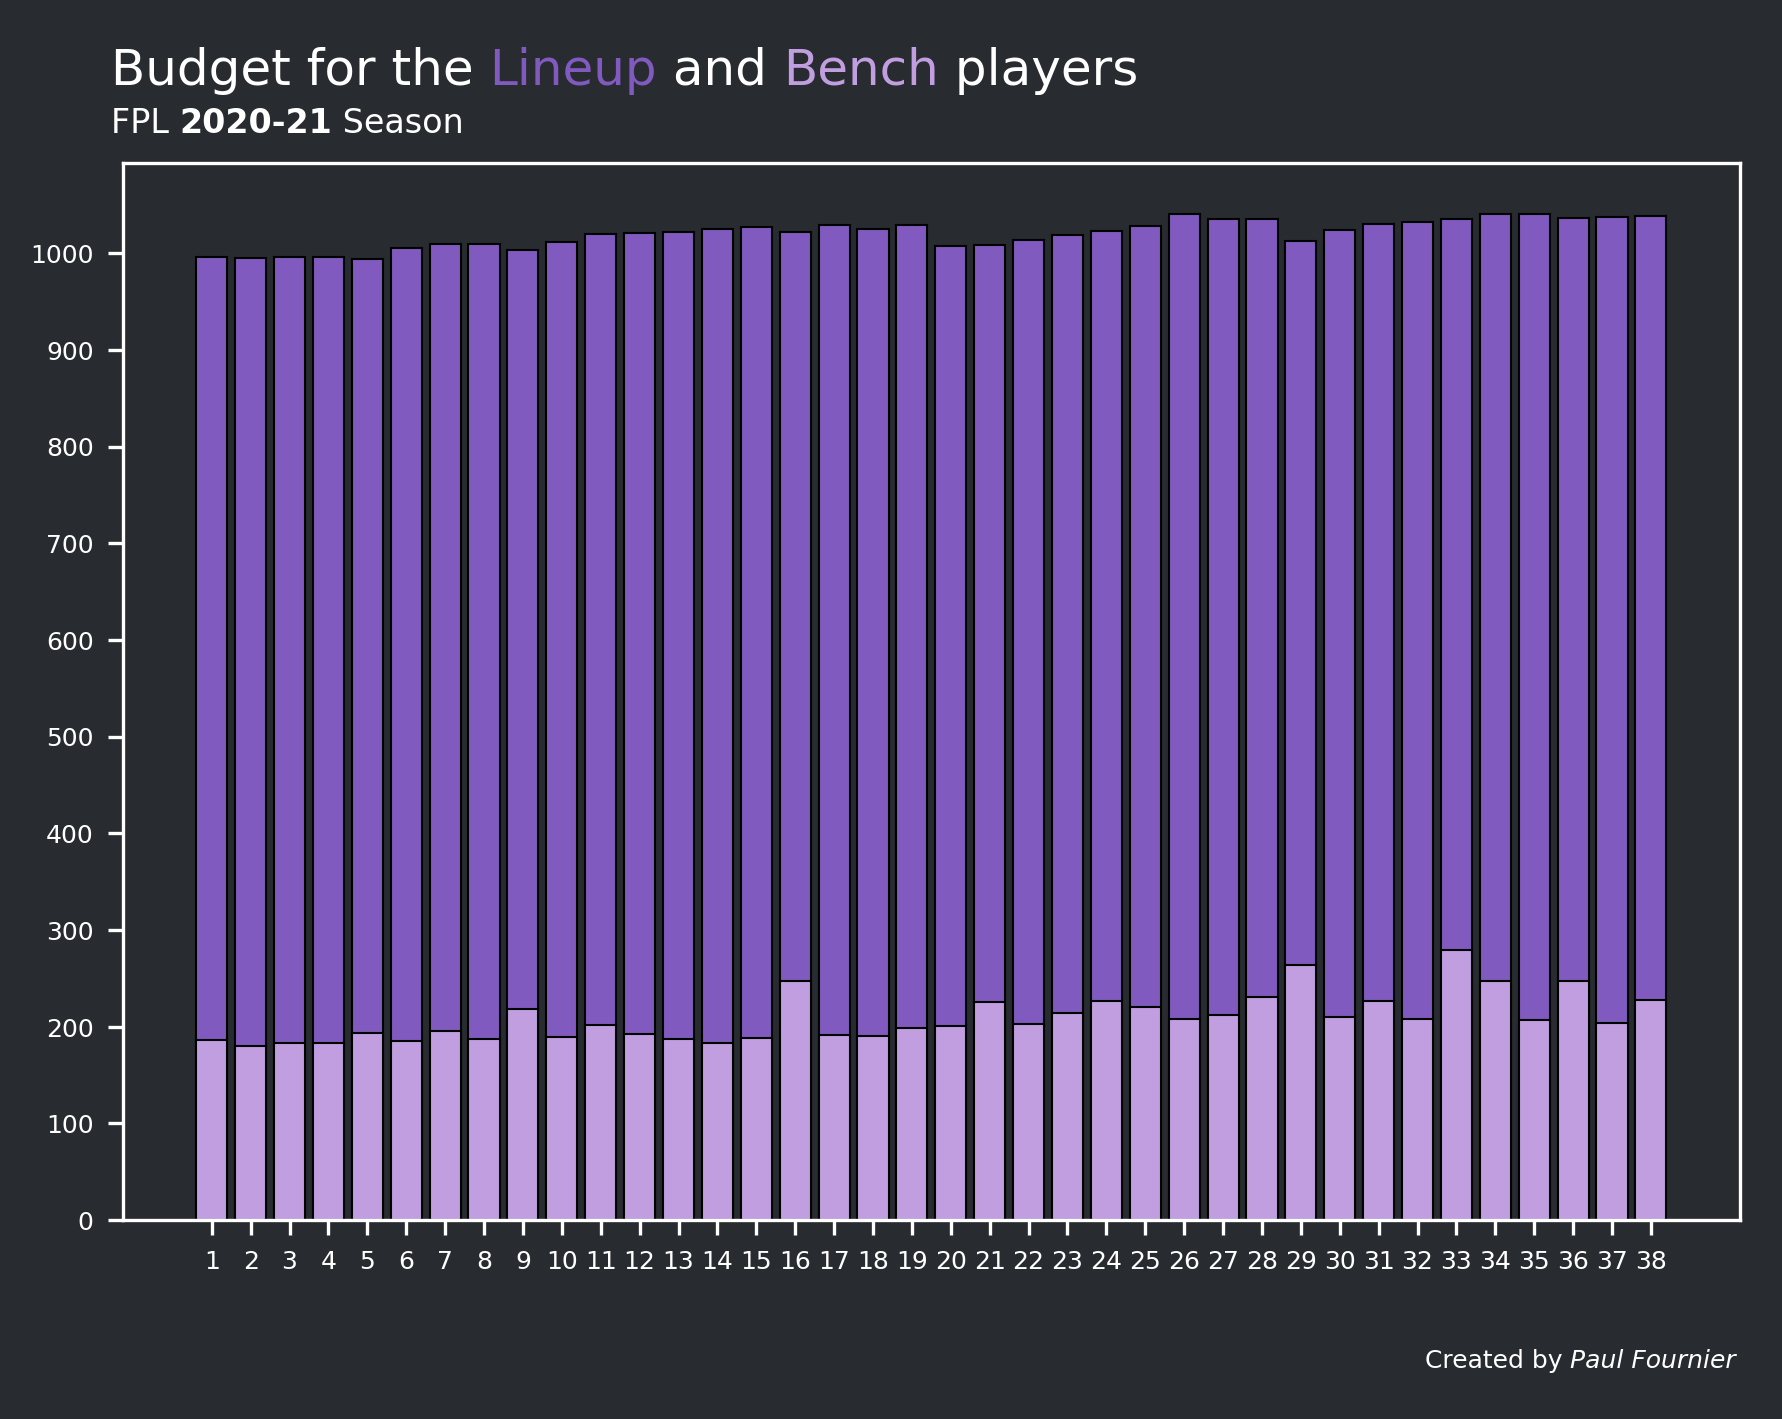

In [10]:
fig, ax = plt.subplots(tight_layout=True)
fig.set_facecolor(background)
ax.patch.set_alpha(0)

lineup, bench = [], []

for gw in range(1, 39):
    lineup.append(np.mean(team_value.loc[:, str(gw)]))
    bench.append(np.mean(bench_value.loc[:, str(gw)]))

ax.bar(
    np.arange(1, 39), lineup,
    color='#815ac0', edgecolor='black', linewidth=0.5)
ax.bar(
    np.arange(1, 39), bench,
    color='#c19ee0', edgecolor='black', linewidth=0.5)

ax.set_xticks(np.arange(1, 39), minor=False)
ax.set_yticks(np.arange(0, 1010, 100), minor=False)

fig_text(x=0.07, y=1.06,
        s="Budget for the <Lineup> and <Bench> players",
        highlight_textprops=[
            {"color": '#815ac0'},
            {"color": '#c19ee0'},
            ],
        fontsize=12, fontfamily=title_font, color=text_color, alpha=1)
fig_text(x=0.07, y=1.01,
        s="FPL <2020-21> Season",
        highlight_textprops=[{"fontweight": "bold"}],
        fontsize=8, fontfamily=title_font, color=text_color, alpha=1)

fig_text(
    x=0.8, y=-0.025,
    s="Created by <Paul Fournier>",
    highlight_textprops=[{"fontstyle": "italic"}],
    fontsize=6, fontfamily=watermark_font, color=text_color)
    
plt.show()

# In The Bank

In [11]:
all_files = (
    glob.glob(os.path.join(path, "in_the_bank_[0-9][0-9][0-9][0-9].csv")) +
    glob.glob(os.path.join(path, "in_the_bank_[0-9][0-9][0-9][0-9][0-9].csv")) + 
    glob.glob(os.path.join(path, "in_the_bank_100000.csv"))
)
in_the_bank = (
    pd.read_csv(f, index_col=0)
    for f in all_files)
in_the_bank = pd.concat(in_the_bank)
in_the_bank.sort_index(inplace=True)

In [12]:
in_the_bank_10k = in_the_bank.iloc[:10000][['1', '2', '3']]
in_the_bank_10k.describe().iloc[1:]

,1,2,3
mean,4.24050,7.910900,14.887200
std,6.81728,27.026117,39.720663
min,0.00000,0.000000,0.000000
25%,0.00000,0.000000,1.000000
50%,0.00000,1.000000,3.000000
75%,5.00000,9.000000,11.000000
max,65.00000,531.000000,601.000000


In [13]:
in_the_bank_25k = in_the_bank.iloc[10000:25000][['1', '2', '3']]
in_the_bank_25k.describe().iloc[1:]

,1,2,3
mean,4.316333,8.276467,15.674333
std,7.165963,27.959748,41.401375
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,0.000000,1.000000,3.000000
75%,5.000000,9.000000,11.000000
max,80.000000,608.000000,636.000000


In [14]:
in_the_bank_50k = in_the_bank.iloc[25000:][['1', '2', '3']]
in_the_bank_50k.describe().iloc[1:]

,1,2,3
mean,4.55451,8.690570,17.150315
std,7.56708,26.765478,43.464887
min,0.00000,0.000000,0.000000
25%,0.00000,0.000000,0.000000
50%,0.00000,3.000000,3.000000
75%,5.00000,9.000000,12.000000
max,110.00000,601.000000,663.000000


Given the very noisy in the bank data, we only will analyse the first three GWs. The most interesting for me in the Gameweek 1 (i.e. the only one column that will have no noise). **The better the rank, the fewer money is kept in the bank.**